**1)DOWNLOADING THE DATA SET**

**2)LOADING THE DATASET**

In [1]:
from google.colab import files
uploaded=files.upload()

Saving abalone.csv to abalone.csv


In [2]:
import pandas as pd
abalone=pd.read_csv('abalone.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
abalone.shape

(4177, 9)

In [4]:
df=pd.read_csv("/content/abalone.csv")
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


**3)VISUALIZATION**

**UNIVARIATE ANALYSIS**


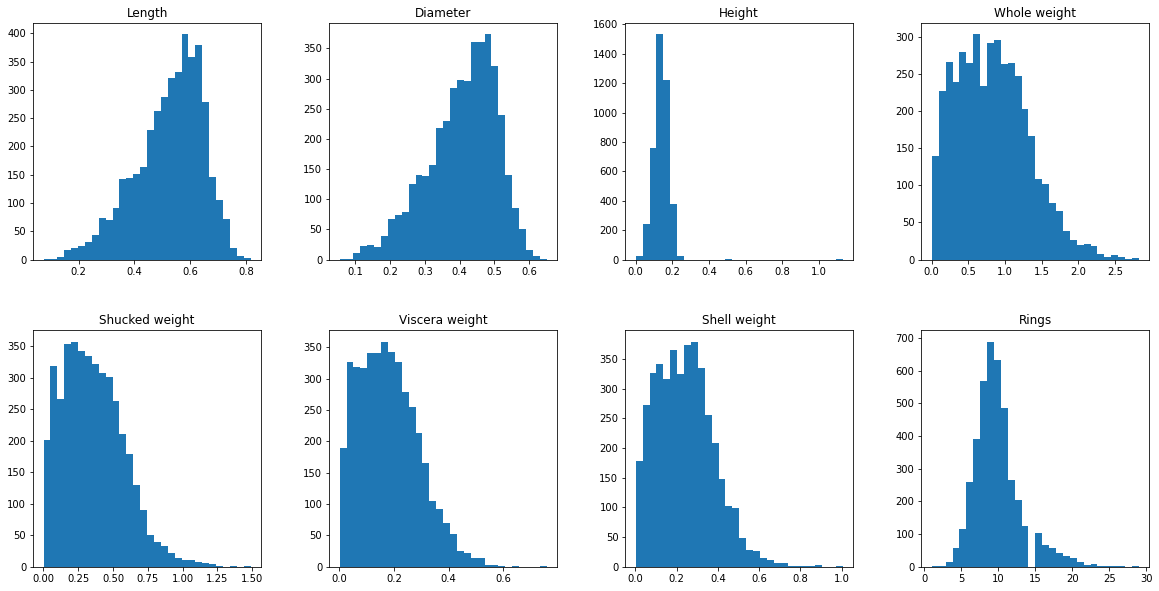

In [6]:
import matplotlib.pyplot as plt
df.hist(figsize=(20,10),grid=False,layout=(2,4),bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

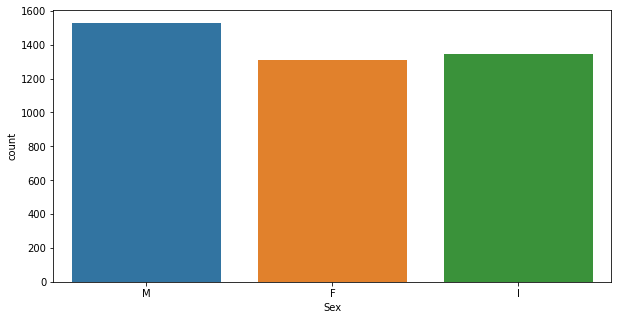

In [8]:
import seaborn as sns
plt.figure(figsize=(10,5))
sns.countplot(df['Sex'])
plt.show

**BIVARIATE ANALYSIS**

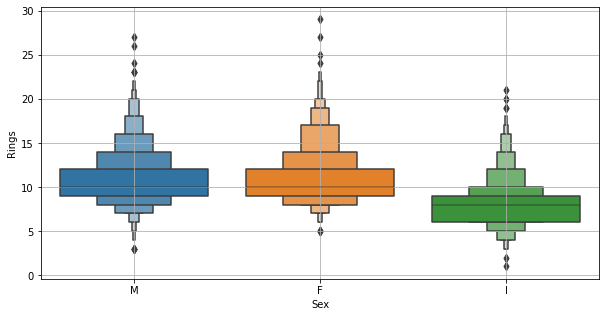

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,1307.0,11.129304,3.104256,5.0,9.0,10.0,12.0,29.0
I,1342.0,7.890462,2.511554,1.0,6.0,8.0,9.0,21.0
M,1528.0,10.705497,3.026349,3.0,9.0,10.0,12.0,27.0


In [9]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=df['Rings'],x=df['Sex'])
plt.grid()
plt.show()
df.groupby('Sex')['Rings'].describe()


**MULTIVARIATE ANALYSIS**

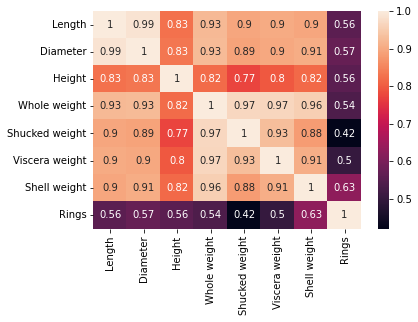

In [10]:
var=sns.heatmap(abalone.corr(),annot=True)
plt.show()

**3) DESCRIPTIVE STATISTICS**

In [11]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


**4) MISSING VALUES**

In [12]:
abalone.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

**5) FINDING OUTLIERS AND REPLACING OUTLIERS**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


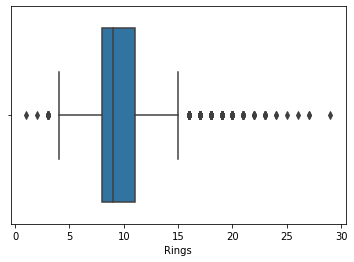

In [13]:
sns.boxplot(abalone['Rings'])

In [15]:
q=abalone.quantile(q=[0.75,0.5])
iqr=q.iloc[0]-q.iloc[1]
iqr

Length            0.0700
Diameter          0.0550
Height            0.0250
Whole weight      0.3535
Shucked weight    0.1660
Viscera weight    0.0820
Shell weight      0.0950
Rings             2.0000
dtype: float64

In [16]:
l=q.iloc[1]-(1.5*iqr)
l['Rings']

6.0

In [17]:
u=q.iloc[1]+(1.5*iqr)
u['Rings']

12.0

In [20]:
import numpy as np
abalone['Rings']=np.where(abalone['Rings']>u['Rings'],u['Rings'],np.where(abalone['Rings']<l['Rings'],l['Rings'],abalone['Rings']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


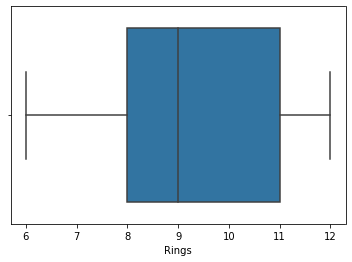

In [38]:
sns.boxplot(abalone['Rings'])

**7) CHECK FOR CATEGORICAL COLUMNS AND PERFORM ENCODING**

In [34]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from collections import Counter as count
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'].tolist())
transformed_sex_feature=OneHotEncoder().fit_transform(df['Sex'].values.reshape(1,-1)).toarray()
df_sex_encoded=pd.DataFrame(transformed_sex_feature,columns=["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df=pd.concat([df,df_sex_encoded],axis=1)
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_0,...,Sex_4167,Sex_4168,Sex_4169,Sex_4170,Sex_4171,Sex_4172,Sex_4173,Sex_4174,Sex_4175,Sex_4176
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**8)SPLIT THE DATA INTO DEPENDENT AND INDEPENDENT VARIABLES**

  **INDEPENDENT VARIABLE**

In [26]:
x=abalone.iloc[:,1:8]
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


**DEPENDENT VARIABLE**

In [27]:
y=abalone['Rings']
y

0       12.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

In [28]:
abalone.Sex=abalone.Sex.map({'M':0,'F':1,'I':2})
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 293.8 KB


**9)SCALING THE INDEPENDENT VARIABLES**

In [30]:
from sklearn.preprocessing import scale
scale(x)

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.60768536,
        -0.72621157, -0.63821689],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.17090984,
        -1.20522124, -1.21298732],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.4634999 ,
        -0.35668983, -0.20713907],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.74855917,
         0.97541324,  0.49695471],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.77334105,
         0.73362741,  0.41073914],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  2.64099341,
         1.78744868,  1.84048058]])

**10)SPLIT THE DATA INTO TRAINING AND TESTING**

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
print(x_train)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
3141   0.180     0.135   0.080        0.0330          0.0145          0.0070   
3521   0.215     0.150   0.055        0.0410          0.0150          0.0090   
883    0.660     0.530   0.170        1.3905          0.5905          0.2120   
3627   0.715     0.525   0.200        1.8900          0.9500          0.4360   
2106   0.595     0.455   0.155        1.0410          0.4160          0.2105   
...      ...       ...     ...           ...             ...             ...   
1033   0.650     0.525   0.185        1.6220          0.6645          0.3225   
3264   0.655     0.500   0.140        1.1705          0.5405          0.3175   
1653   0.595     0.450   0.145        0.9590          0.4630          0.2065   
2607   0.625     0.490   0.165        1.1270          0.4770          0.2365   
2732   0.410     0.325   0.110        0.3260          0.1325          0.0750   

      Shell weight  
3141        0.0100

In [34]:
print(x_test)

      Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
668    0.550     0.425   0.155        0.9175          0.2775          0.2430   
1580   0.500     0.400   0.120        0.6160          0.2610          0.1430   
3784   0.620     0.480   0.155        1.2555          0.5270          0.3740   
463    0.220     0.165   0.055        0.0545          0.0215          0.0120   
2615   0.645     0.500   0.175        1.5105          0.6735          0.3755   
...      ...       ...     ...           ...             ...             ...   
575    0.610     0.475   0.140        1.1330          0.5275          0.2355   
3231   0.410     0.325   0.120        0.3745          0.1580          0.0810   
1084   0.445     0.345   0.105        0.4090          0.1675          0.1015   
290    0.540     0.435   0.180        0.9960          0.3835          0.2260   
2713   0.250     0.175   0.060        0.0635          0.0275          0.0080   

      Shell weight  
668         0.3350

In [35]:
print(y_train)

3141     6.0
3521     6.0
883     12.0
3627    10.0
2106    12.0
        ... 
1033    10.0
3264    12.0
1653    10.0
2607     9.0
2732     8.0
Name: Rings, Length: 3341, dtype: float64


In [36]:
print(y_test)

668     12.0
1580     8.0
3784    11.0
463      6.0
2615    12.0
        ... 
575     11.0
3231    12.0
1084     7.0
290     12.0
2713     6.0
Name: Rings, Length: 836, dtype: float64


**11)BUILD THE MODEL**

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVR

In [71]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()


**12)TRAINING  THE MODEL**

**13)TESTING THE MODEL**

In [72]:
clf.fit(x_train,y_train)

LinearRegression()

In [73]:
clf.predict(x_test)

array([10.93763821,  9.27391749, 10.2210372 ,  6.23951107, 10.33451111,
       10.90301793,  8.18437885,  9.26217905,  8.23584321, 10.91277438,
        8.72901421,  6.8773819 ,  8.20826926,  8.9783078 ,  6.33056503,
        9.38356306,  7.67535509, 11.46913749, 10.3591952 ,  8.39901975,
        7.89187534,  7.39053793,  8.94613434,  7.5630011 ,  9.59619086,
       10.28066853,  5.52014515, 11.11203158, 10.18395192, 10.06969646,
        7.96760858,  5.52924561, 10.48131205, 11.80393298,  7.98680428,
        8.62500685,  8.73359606, 10.08371322,  8.48960104, 10.54338588,
       10.39818534,  9.05244507, 10.19445596, 10.25486148, 11.07168055,
        8.96509204,  9.44109907, 10.9187036 , 10.58116333,  8.16749554,
       10.39914358,  7.76079936,  8.76701226, 11.23597329,  8.97780427,
        8.23188743,  6.62403187,  7.51114548,  7.90589332,  7.55471743,
        9.75055332,  9.28182681,  9.97489102,  8.46688237,  8.2057224 ,
       10.85309753, 11.19794196, 10.98205944,  9.15039862, 12.06

In [55]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(x_train,y_train)
# apply the model to the test and train data
predicted_y_train = model.predict(x_train)
predicted_y_train= model.predict(x_train)

In [70]:
from sklearn.metrics import accuracy_score
# Select algorithm
model = DecisionTreeClassifier()
# Fit model to the data
model.fit(x_train, y_train)
# Check model performance on training data
predictions = model.predict(x_train)
print(accuracy_score(y_train, predictions))

1.0


**14)MEASURE THE PERFORMANCE USING METRICS**

In [51]:
metrics.accuracy_score(pred,y_test)

0.43899521531100477

In [48]:
print(metrics.classification_report(y_test,pred))


              precision    recall  f1-score   support

         6.0       0.58      0.83      0.68        96
         7.0       0.37      0.20      0.26        98
         8.0       0.34      0.49      0.40       113
         9.0       0.32      0.45      0.38       127
        10.0       0.31      0.13      0.18       107
        11.0       0.00      0.00      0.00        95
        12.0       0.54      0.70      0.61       200

    accuracy                           0.44       836
   macro avg       0.35      0.40      0.36       836
weighted avg       0.37      0.44      0.39       836



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
